

Please refer to the documentation at [OpenBB Documentation](https://docs.openbb.co/) for additional guidance.


## Comprehensive Fundamental Analysis of Public Companies Using OpenBB

#### Description
This notebook demonstrates how to use OpenBB to fetch financial KPIs, analyze company valuations, and perform a fundamental analysis of publicly traded companies. We will walk through steps to retrieve and interpret data from financial statements, calculate and analyze key financial ratios, and compare valuation metrics across peer companies.

#### Author
[Sahil Bodke](https://github.com/Sahilmb)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenBB-Finance/OpenBB/blob/develop/examples/comprehensive_fundamental_analysis_with_OpenBB.ipynb.ipynb)

If you are running this notebook in Colab, you can run the following command to install the OpenBB Platform:

```python
!pip install openbb
```


## 1. Installing necessary libraries



In [1]:
!pip install openbb pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.6/270.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.3/280.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.

In [1]:
# Import libraries for analysis and visualization
from openbb import obb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explanation
- `openbb` is used for retrieving data on financial statements, ratios, and company comparisons.
- `pandas` is used for data manipulation.
- `matplotlib` and `seaborn` (`sns`) are used for creating visually appealing and insightful plots.


## 2. Importing Data
This cell fetches historical stock rate data for the Apple stocks using yfinance provider, choose the provider accordingly.

Symbols of few more giants for reference:

- Microsoft: MSFT
- Alphabet (Google): GOOG
- Amazon: AMZN
- Tesla: TSLA

Repeat as needed for each company, referring to the [Yahoo Finance website](https://finance.yahoo.com/) for additional ticker symbols.

In [2]:
# Define the stock symbol and start date
symbol = 'AAPL'  # Apple Inc.
start_date = '1991-01-01'

# Fetch historical stock price data using yfinance
try:
    df = obb.equity.price.historical(symbol=symbol, start_date=start_date, provider="yfinance").to_df()
    df['Symbol'] = symbol  # Adding a symbol column to identify the stock
    df.reset_index(inplace=True)  # Reset index for cleaner data frame structure
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure date column is in datetime format
    print("Data fetched successfully.")
except Exception as e:
    print(f"Error fetching data for {symbol}: {e}")

# Display the first few rows of the data frame
df.head()


Data fetched successfully.


,date,open,high,low,close,volume,split_ratio,dividend,Symbol
0,1991-01-02,0.381696,0.392857,0.375000,0.388393,154985600,0.0,0.0,AAPL
1,1991-01-03,0.388393,0.395089,0.383929,0.383929,150180800,0.0,0.0,AAPL
2,1991-01-04,0.383929,0.395089,0.383929,0.386161,141523200,0.0,0.0,AAPL
3,1991-01-07,0.383929,0.404018,0.383929,0.386161,310800000,0.0,0.0,AAPL
4,1991-01-08,0.390625,0.391741,0.379464,0.386161,218691200,0.0,0.0,AAPL


**Additional Instructions for Other Stocks**

To analyze different stocks (e.g., Microsoft, Google, Amazon, Nvidia), simply replace symbol with the relevant ticker symbol from Yahoo Finance, like so:

**To fetch data for Microsoft, update symbol as follows:**

`symbol = 'MSFT'`

## 3. Data validation


In [3]:
print(f'Total null values across columns are: {df.isna().sum().sum()}')
print(f'Number of duplicate rows in data: {df.duplicated().sum()}')

Total null values across columns are: 0
Number of duplicate rows in data: 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         8522 non-null   datetime64[ns]
 1   open         8522 non-null   float64       
 2   high         8522 non-null   float64       
 3   low          8522 non-null   float64       
 4   close        8522 non-null   float64       
 5   volume       8522 non-null   int64         
 6   split_ratio  8522 non-null   float64       
 7   dividend     8522 non-null   float64       
 8   Symbol       8522 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 599.3+ KB


In [5]:
df.describe()

,date,open,high,low,close,volume,split_ratio,dividend
count,8522,8522.000000,8522.000000,8522.000000,8522.000000,8.522000e+03,8522.000000,8522.000000
mean,2007-11-26 10:54:36.413987584,30.429443,30.754220,30.116936,30.449553,3.624660e+08,0.001760,0.000999
min,1991-01-02 00:00:00,0.114955,0.118304,0.113839,0.115513,2.396800e+06,0.000000,0.000000
25%,1999-06-08 06:00:00,0.398270,0.406250,0.390625,0.398438,1.269827e+08,0.000000,0.000000
50%,2007-11-26 12:00:00,4.075179,4.107143,3.984286,4.056428,2.446920e+08,0.000000,0.000000
75%,2016-05-12 18:00:00,29.303125,29.525000,29.049999,29.287501,4.601730e+08,0.000000,0.000000
max,2024-10-30 00:00:00,236.479996,237.490005,234.449997,236.479996,7.421641e+09,7.000000,0.250000
std,NaN,53.227346,53.788384,52.698748,53.271085,3.619839e+08,0.092542,0.013614


In [6]:
print(f"Data starts from: {df['date'].min()}")
print(f"Data ends at: {df['date'].max()}")
duplicate_dates = df[df.duplicated(subset=['date'], keep=False)]
print(f"Number of rows with duplicated dates: {len(duplicate_dates)}")

Data starts from: 1991-01-02 00:00:00
Data ends at: 2024-10-30 00:00:00
Number of rows with duplicated dates: 0


*We are good to go with fundamental analysis as there are no duplicates and null values present in the dataset*

## 4. Fundamental Analysis

### 4.1 Statement Analysis

In [7]:
# # Define the stock symbol
# symbol = 'AAPL'  # Example: Apple Inc.

# Fetch financial statements (Income Statement, Balance Sheet, Cash Flow)
try:
    income_statement = obb.equity.fundamental.income(symbol).to_df()
    balance_sheet = obb.equity.fundamental.balance(symbol).to_df()
    cash_flow = obb.equity.fundamental.cash(symbol).to_df()

    print("Financial statements fetched successfully.")
except AttributeError as e:
    print("Failed to fetch financial statements:", e)

# Display the first few rows of each financial statement
print("Income Statement:")
print(income_statement.head())
print("\nBalance Sheet:")
print(balance_sheet.head())
print("\nCash Flow Statement:")
print(cash_flow.head())


/usr/local/lib/python3.10/dist-packages/openbb_yfinance/models/income_statement.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna("N/A").replace("N/A", None).to_dict()


Financial statements fetched successfully.
Income Statement:
  period_ending  operating_revenue  total_revenue  cost_of_revenue  \
0    2023-09-30       3.832850e+11   3.832850e+11     2.141370e+11   
1    2022-09-30       3.943280e+11   3.943280e+11     2.235460e+11   
2    2021-09-30       3.658170e+11   3.658170e+11     2.129810e+11   
3    2020-09-30       2.745150e+11   2.745150e+11     1.695590e+11   

   gross_profit  selling_general_and_admin_expense  \
0  1.691480e+11                       2.493200e+10   
1  1.707820e+11                       2.509400e+10   
2  1.528360e+11                       2.197300e+10   
3  1.049560e+11                       1.991600e+10   

   research_and_development_expense  operating_expense  operating_income  \
0                      2.991500e+10       5.484700e+10      1.143010e+11   
1                      2.625100e+10       5.134500e+10      1.194370e+11   
2                      2.191400e+10       4.388700e+10      1.089490e+11   
3            

/usr/local/lib/python3.10/dist-packages/openbb_yfinance/models/cash_flow.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna("N/A").replace("N/A", None).to_dict()


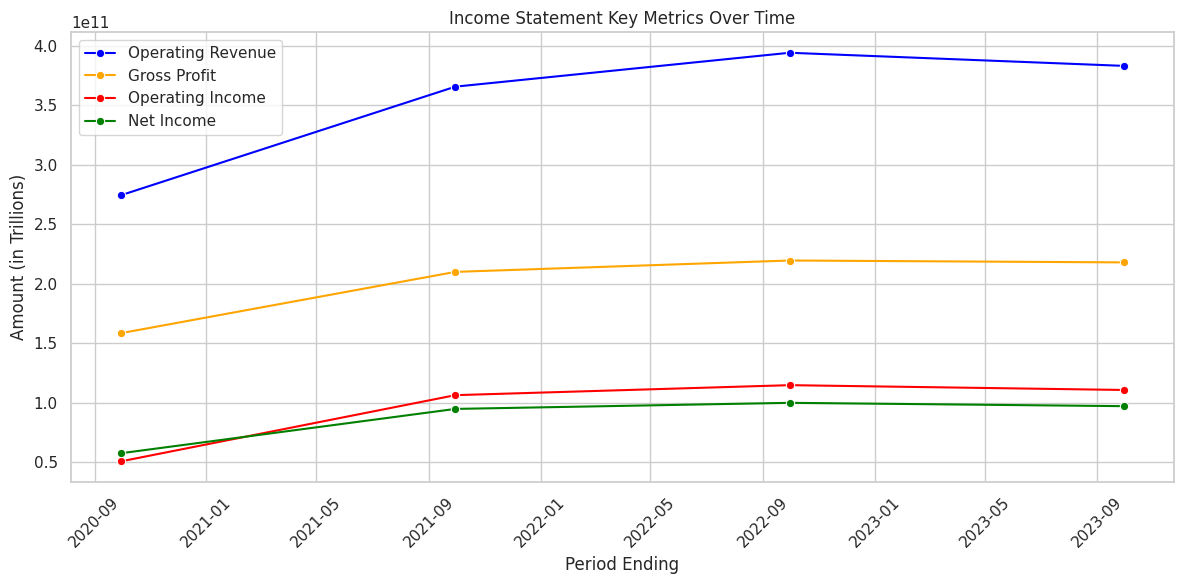

In [8]:
# Income Statement Data
data = {
    'period_ending': ['2023-09-30', '2022-09-30', '2021-09-30', '2020-09-30'],
    'operating_revenue': [3.832850e+11, 3.943280e+11, 3.658170e+11, 2.745150e+11],
    'gross_profit': [2.179590e+11, 2.195410e+11, 2.099730e+11, 1.584490e+11],
    'operating_income': [1.106140e+11, 1.146650e+11, 1.062590e+11, 5.059300e+10],
    'net_income': [9.699500e+10, 9.980300e+10, 9.468000e+10, 5.741100e+10],
}

df = pd.DataFrame(data)

# Converting period_ending to datetime
df['period_ending'] = pd.to_datetime(df['period_ending'])

# Setting the plot style
sns.set(style="whitegrid")

# Creating a line plot for all key metrics
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='period_ending', y='operating_revenue', marker='o', label='Operating Revenue', color='blue')
sns.lineplot(data=df, x='period_ending', y='gross_profit', marker='o', label='Gross Profit', color='orange')
sns.lineplot(data=df, x='period_ending', y='operating_income', marker='o', label='Operating Income', color='red')
sns.lineplot(data=df, x='period_ending', y='net_income', marker='o', label='Net Income', color='green')

# Adding labels and title
plt.title('Income Statement Key Metrics Over Time')
plt.xlabel('Period Ending')
plt.ylabel('Amount (in Trillions)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Showing the plot
plt.show()


## Income Statement

**Total Revenue** shows fluctuations across periods, with recent revenue around 384 billion for the latest fiscal year.

**Operating Revenue** steadily climbs from 2.8 trillion in September 2020 to around 3.8 trillion by September 2023, with a slight dip at the end.

**Gross Profit** shows a consistent increase from 1.6 trillion to about 2.2 trillion over the same period.

**Operating Income** rises from 0.5 trillion to approximately 1.0 trillion, with a subtle, steady incline.

**Net Income** starts at 0.6 trillion and reaches around 0.9 trillion, also showing gradual growth.

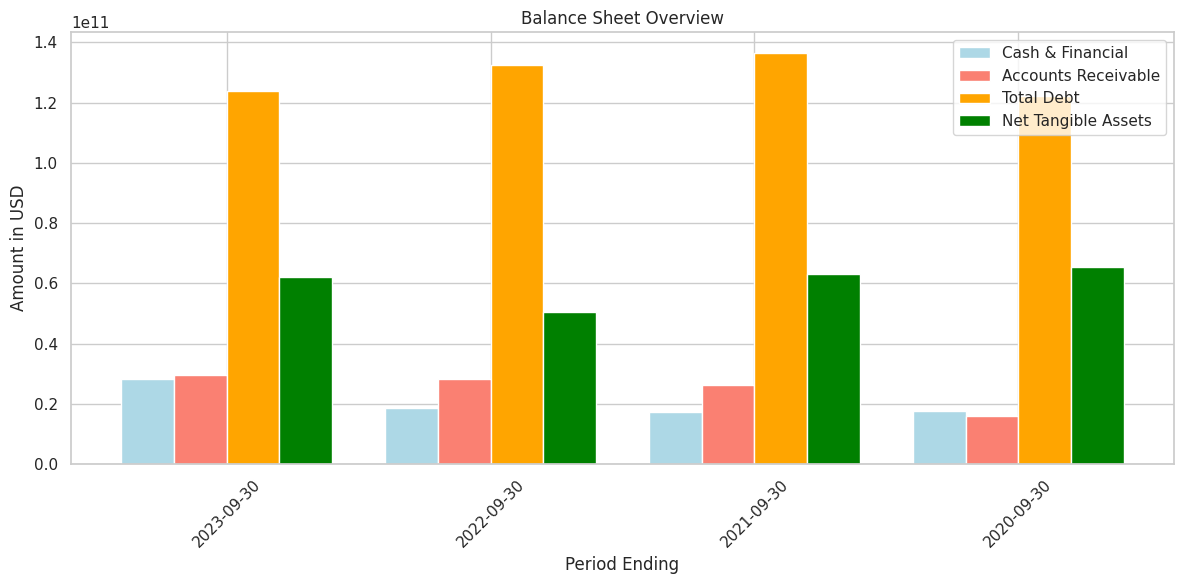

In [9]:
# Data for balance sheet
data = {
    'period_ending': pd.to_datetime(['2023-09-30', '2022-09-30', '2021-09-30', '2020-09-30']),
    'cash_financial': [2.835900e+10, 1.854600e+10, 1.730500e+10, 1.777300e+10],
    'accounts_receivable': [2.950800e+10, 2.818400e+10, 2.627800e+10, 1.612000e+10],
    'total_debt': [1.239300e+11, 1.324800e+11, 1.365220e+11, 1.222780e+11],
    'net_tangible_assets': [6.214600e+10, 5.067200e+10, 6.309000e+10, 6.533900e+10]
}

# Creating a DataFrame
df_balance = pd.DataFrame(data)

# Setting bar width and x-axis positions
bar_width = 0.2
x = np.arange(len(df_balance))

# Creating the plot
plt.figure(figsize=(12, 6))

# Creating bars for each category
plt.bar(x, df_balance['cash_financial'], width=bar_width, label='Cash & Financial', color='lightblue')
plt.bar(x + bar_width, df_balance['accounts_receivable'], width=bar_width, label='Accounts Receivable', color='salmon')
plt.bar(x + 2 * bar_width, df_balance['total_debt'], width=bar_width, label='Total Debt', color='orange')
plt.bar(x + 3 * bar_width, df_balance['net_tangible_assets'], width=bar_width, label='Net Tangible Assets', color='green')

# Formatting the x-axis
plt.xticks(x + 1.5 * bar_width, df_balance['period_ending'].dt.strftime('%Y-%m-%d'), rotation=45)

# Adding labels and title
plt.xlabel('Period Ending')
plt.ylabel('Amount in USD')
plt.title('Balance Sheet Overview')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## Balance Sheet Statement

- The company has high debt but also maintains significant tangible assets.

- Cash and receivables are stable but low compared to debt, suggesting a potential area for improvement in [liquidity management](https://tipalti.com/resources/learn/liquidity-management/#:~:text=Liquidity%20management%20is%20the%20proactive,impacts%20a%20company's%20working%20capital.).

- It's crucial for the company to manage its debt effectively and possibly increase cash reserves and receivables to ensure better financial health and flexibility.


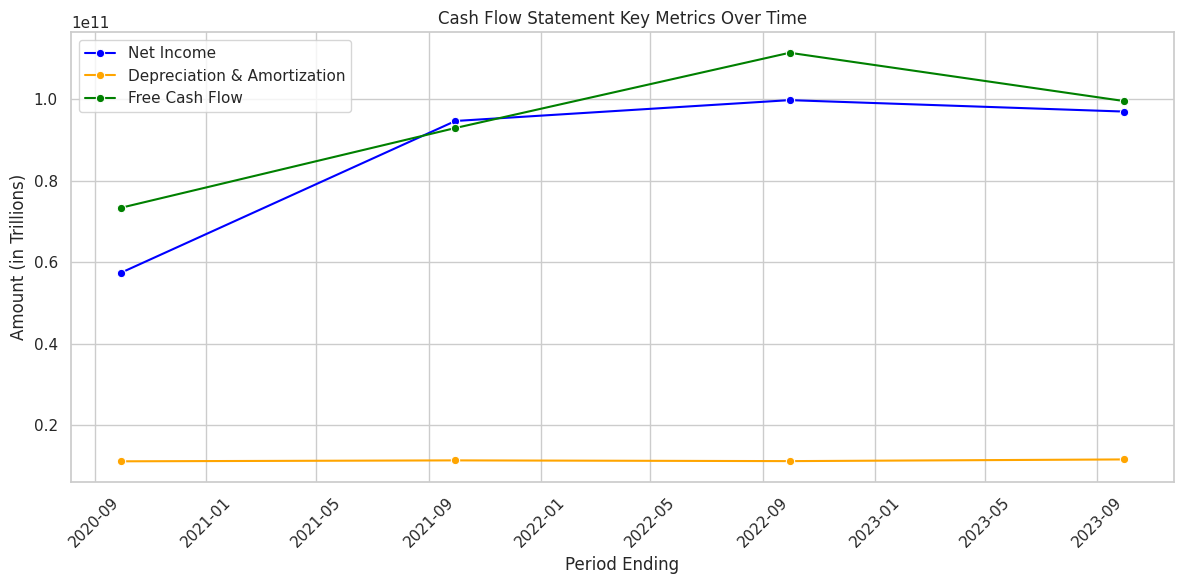

In [10]:
# Cash Flow Statement Data
cash_flow_data = {
    'period_ending': ['2023-09-30', '2022-09-30', '2021-09-30', '2020-09-30'],
    'net_income_from_continuing_operations': [9.699500e+10, 9.980300e+10, 9.468000e+10, 5.741100e+10],
    'depreciation_and_amortization': [1.151900e+10, 1.110400e+10, 1.128400e+10, 1.105600e+10],
    'free_cash_flow': [9.958400e+10, 1.114430e+11, 9.295300e+10, 7.336500e+10]
}

df_cash_flow = pd.DataFrame(cash_flow_data)
df_cash_flow['period_ending'] = pd.to_datetime(df_cash_flow['period_ending'])

# Create a line plot for key cash flow metrics
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cash_flow, x='period_ending', y='net_income_from_continuing_operations', marker='o', label='Net Income', color='blue')
sns.lineplot(data=df_cash_flow, x='period_ending', y='depreciation_and_amortization', marker='o', label='Depreciation & Amortization', color='orange')
sns.lineplot(data=df_cash_flow, x='period_ending', y='free_cash_flow', marker='o', label='Free Cash Flow', color='green')

# Add labels and title
plt.title('Cash Flow Statement Key Metrics Over Time')
plt.xlabel('Period Ending')
plt.ylabel('Amount (in Trillions)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## Cash flow statement

- Net Income from Continuing Operations shows a rise from around 57.4 billion in September 2020 to 96.9 billion in September 2023, though it dips slightly in 2022.

- Depreciation and Amortization holds steady, around 11 billion throughout.

- Free Cash Flow increases from 73.4 billion in 2020 to nearly 100 billion in 2023, peaking at 111 billion in 2022 before a slight decline.

Overall, the company's financial health looks strong, despite minor declines in the last year(2023).


### 4.2 Retrieving key financial ratios

In [33]:
from google.colab import userdata
fmp_api_key = userdata.get('FMP_API_KEY') # Securely retrieve the API key
obb.user.credentials.fmp_api_key = fmp_api_key # for OpenBB usage

In [34]:
# Retrieve key financial ratios for AAPL from the 'fmp' provider
ratios_fmp = obb.equity.fundamental.ratios(symbol='AAPL', provider='fmp').to_df()
print("Ratios from FMP Provider:", ratios_fmp)

Ratios from FMP Provider:   period_ending fiscal_period  fiscal_year  current_ratio  quick_ratio  \
0    2023-09-30            FY         2023       0.988012     0.944442   
1    2022-09-24            FY         2022       0.879356     0.847235   
2    2021-09-25            FY         2021       1.074553     1.022115   
3    2020-09-26            FY         2020       1.363604     1.325072   
4    2019-09-28            FY         2019       1.540126     1.501286   

   cash_ratio  days_of_sales_outstanding  days_of_inventory_outstanding  \
0    0.206217                  58.075649                      10.791292   
1    0.153563                  56.400205                       8.075698   
2    0.278449                  51.390969                      11.276593   
3    0.360710                  49.787534                       8.741883   
4    0.462022                  64.258765                       9.263639   

   operating_cycle  days_of_payables_outstanding  ...  price_to_sales_ratio  \

### 4.3 Visualizing key metrics

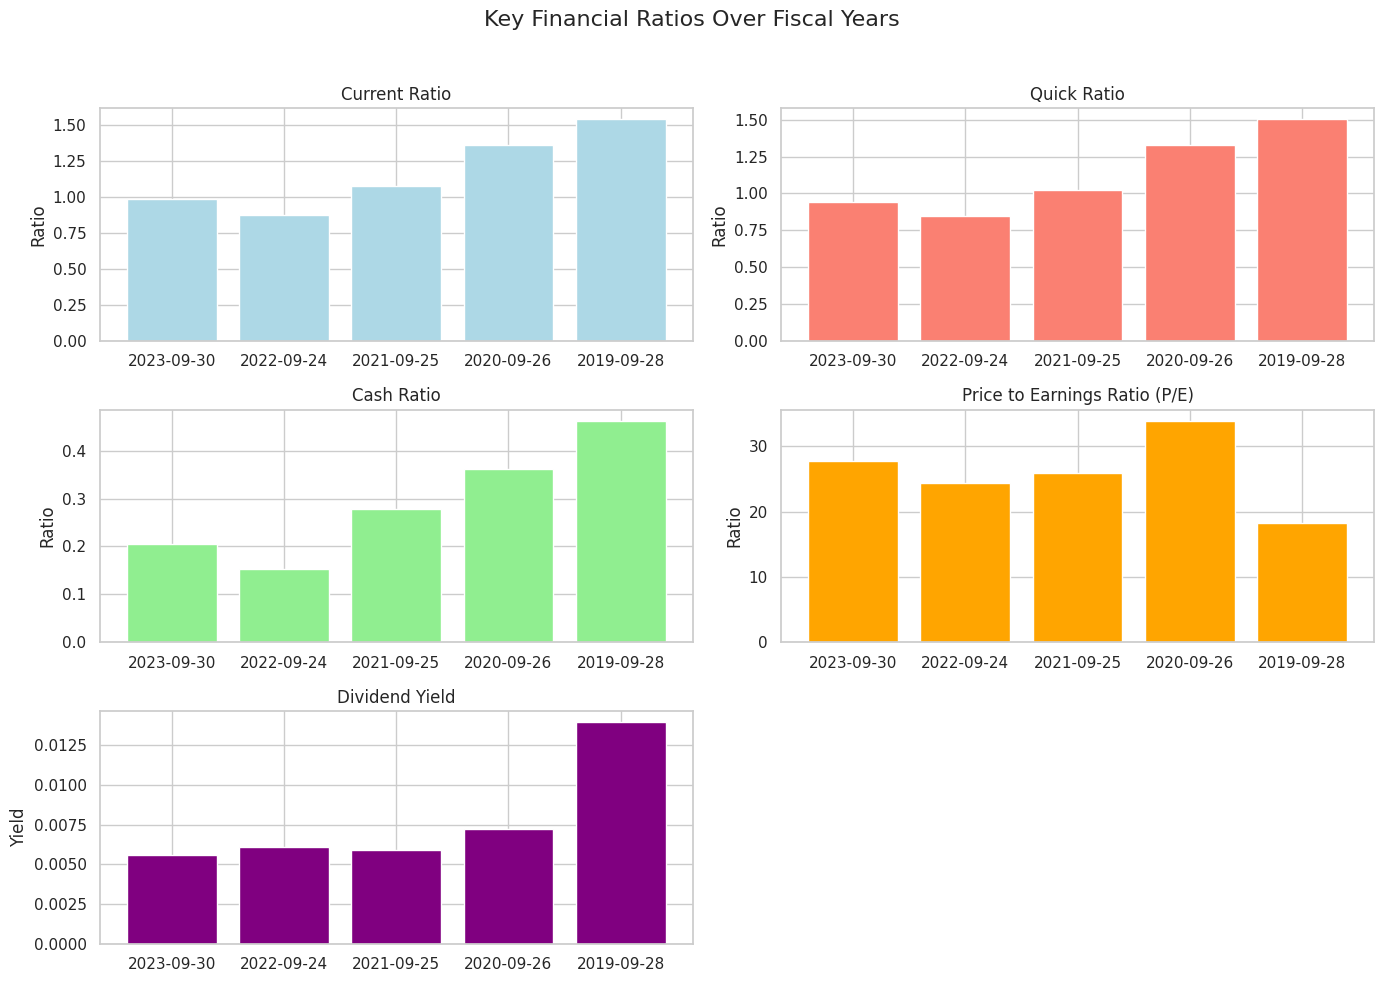

In [38]:
# Plotting key metrics
data = {
    'period_ending': ['2023-09-30', '2022-09-24', '2021-09-25', '2020-09-26', '2019-09-28'],
    'current_ratio': [0.988012, 0.879356, 1.074553, 1.363604, 1.540126],
    'quick_ratio': [0.944442, 0.847235, 1.022115, 1.325072, 1.501286],
    'cash_ratio': [0.206217, 0.153563, 0.278449, 0.360710, 0.462022],
    'price_earnings_ratio': [27.790812, 24.441824, 25.916254, 33.935934, 18.288816],
    'dividend_yield': [0.005574, 0.006084, 0.005896, 0.007227, 0.013971],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the period ending as the index
df.set_index('period_ending', inplace=True)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Key Financial Ratios Over Fiscal Years', fontsize=16)

# Plot Current Ratio
axs[0, 0].bar(df.index, df['current_ratio'], color='lightblue')
axs[0, 0].set_title('Current Ratio')
axs[0, 0].set_ylabel('Ratio')

# Plot Quick Ratio
axs[0, 1].bar(df.index, df['quick_ratio'], color='salmon')
axs[0, 1].set_title('Quick Ratio')
axs[0, 1].set_ylabel('Ratio')

# Plot Cash Ratio
axs[1, 0].bar(df.index, df['cash_ratio'], color='lightgreen')
axs[1, 0].set_title('Cash Ratio')
axs[1, 0].set_ylabel('Ratio')

# Plot Price to Earnings Ratio
axs[1, 1].bar(df.index, df['price_earnings_ratio'], color='orange')
axs[1, 1].set_title('Price to Earnings Ratio (P/E)')
axs[1, 1].set_ylabel('Ratio')

# Plot Dividend Yield
axs[2, 0].bar(df.index, df['dividend_yield'], color='purple')
axs[2, 0].set_title('Dividend Yield')
axs[2, 0].set_ylabel('Yield')

# Hide the last far right subplot
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Explanation of the Visualization

**Current Ratio:** Indicates a company's ability to cover its short-term liabilities with its short-term assets. A ratio above 1 indicates good liquidity.

Initially, the company could comfortably cover its short-term liabilities, but there’s been a recent decline, potentially indicating less short-term financial stability.

**Quick Ratio:** A more stringent test of liquidity, excluding inventory from current assets. A ratio above 1 suggests sufficient short-term assets to cover liabilities.

Follows the same trend, peaking in 2019 before declining in 2023, suggesting a reduced ability to meet short-term obligations with the most liquid assets.

**Cash Ratio:** This ratio strictly measures a company’s ability to cover short-term obligations with cash and cash equivalents.

A steady increase suggests growing cash reserves relative to short-term liabilities, reflecting improved liquidity.

**Price to Earnings Ratio (P/E):** Indicates how much investors are willing to pay per dollar of earnings. A higher ratio suggests higher expectations for future growth.

It has fluctuated, peaking in 2020 but dropping significantly in 2019, hinting at changes in market perception or earnings volatility.

**Dividend Yield:** Shows how much a company pays out in dividends relative to its share price. A higher yield indicates a more significant return on investment for shareholders.

The company's liquidity ratios show a worrying decline, indicating potential short-term financial strain. In contrast, a fluctuating but generally high P/E ratio indicates variable investor sentiment, while a stable dividend yield could appeal to income investors. This blend of metrics paints a picture of **Apple** facing liquidity
challenges but retaining some investor confidence.

*To learn more about Financial ratio analysis refer [this](https://www.investopedia.com/terms/r/ratioanalysis.asp).*



### 4.4 Peer comparison of key financial metrics
- We will be comparing Microsoft and Google with Apple.
- First I will be retrieving financial ratios for Microsoft from the 'fmp' provider

In [40]:
ratios_fmp = obb.equity.fundamental.ratios(symbol='MSFT', provider='fmp').to_df()
print("Ratios from FMP Provider:", ratios_fmp)

Ratios from FMP Provider:   period_ending fiscal_period  fiscal_year  current_ratio  quick_ratio  \
0    2024-06-30            FY         2024       1.274955     1.265010   
1    2023-06-30            FY         2023       1.769167     1.745163   
2    2022-06-30            FY         2022       1.784607     1.745251   
3    2021-06-30            FY         2021       2.079994     2.050261   
4    2020-06-30            FY         2020       2.515765     2.489559   

   cash_ratio  days_of_sales_outstanding  days_of_inventory_outstanding  \
0    0.146186                  84.762934                       6.136358   
1    0.333215                  83.859661                      13.854516   
2    0.146516                  81.481137                      21.800958   
3    0.160439                  82.609675                      18.420509   
4    0.187747                  81.697829                      15.010960   

   operating_cycle  days_of_payables_outstanding  ...  price_to_sales_ratio  \

**Now I will be retrieving financial ratios for Google from 'fmp' provider**

In [47]:
ratios_fmp = obb.equity.fundamental.ratios(symbol='GOOGL', provider='fmp').to_df()
print("Ratios from FMP Provider:", ratios_fmp)

Ratios from FMP Provider:   period_ending fiscal_period  fiscal_year  current_ratio  quick_ratio  \
0    2023-12-31            FY         2023       2.096585     2.096585   
1    2022-12-31            FY         2022       2.377994     2.339466   
2    2021-12-31            FY         2021       2.928113     2.909904   
3    2020-12-31            FY         2020       3.066756     3.053947   
4    2019-12-31            FY         2019       3.374052     3.351960   

   cash_ratio  days_of_sales_outstanding  operating_cycle  \
0    0.293935                  56.952510        56.952510   
1    0.315714                  51.952969        59.675052   
2    0.325972                  57.051394        60.900807   
3    0.465654                  62.758715        65.894720   
4    0.409058                  61.996577        67.068278   

   days_of_payables_outstanding  cash_conversion_cycle  ...  \
0                     20.512293              36.440218  ...   
1                     14.831026     

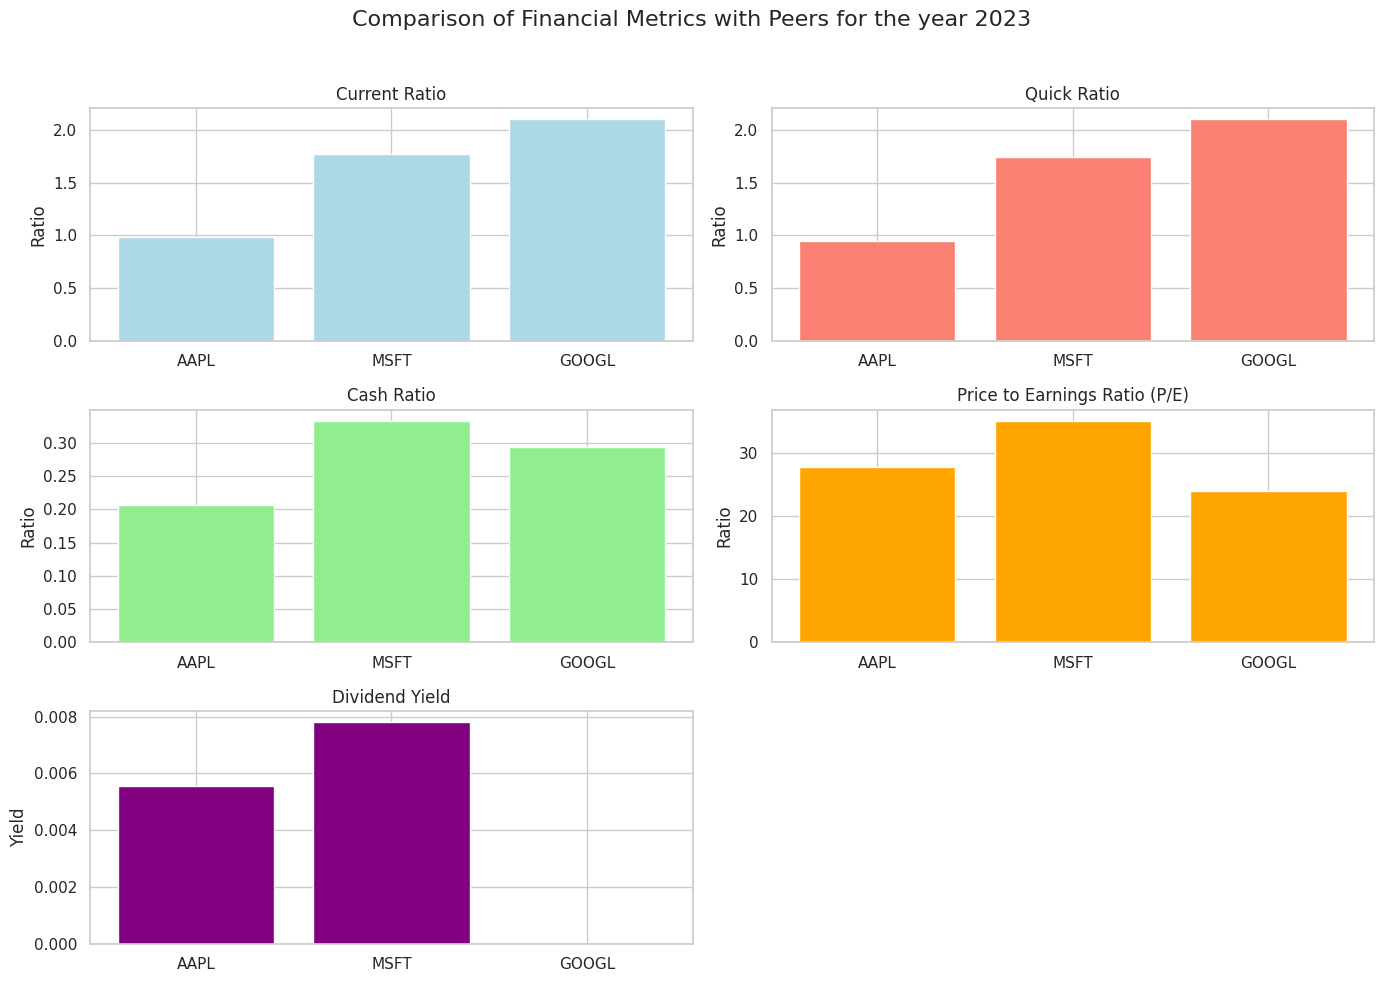

In [46]:
# Plotting key metrics
data = {
    'Company': ['AAPL', 'MSFT', 'GOOGL'],
    'current_ratio': [0.988012,  1.769167, 2.096585 ],
    'quick_ratio': [0.944442, 1.745163, 2.096585],
    'cash_ratio': [0.206217, 0.333215, 0.293935],
    'price_earnings_ratio': [27.790812, 35.041816, 23.907917],
    'dividend_yield': [0.005574, 0.007809, 0.0] # Google don't have a dividend yield
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the company names as the index
df.set_index('Company', inplace=True)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Comparison of Financial Metrics with Peers for the year 2023', fontsize=16)

# Plot Current Ratio
axs[0, 0].bar(df.index, df['current_ratio'], color='lightblue')
axs[0, 0].set_title('Current Ratio')
axs[0, 0].set_ylabel('Ratio')

# Plot Quick Ratio
axs[0, 1].bar(df.index, df['quick_ratio'], color='salmon')
axs[0, 1].set_title('Quick Ratio')
axs[0, 1].set_ylabel('Ratio')

# Plot Cash Ratio
axs[1, 0].bar(df.index, df['cash_ratio'], color='lightgreen')
axs[1, 0].set_title('Cash Ratio')
axs[1, 0].set_ylabel('Ratio')

# Plot Price to Earnings Ratio
axs[1, 1].bar(df.index, df['price_earnings_ratio'], color='orange')
axs[1, 1].set_title('Price to Earnings Ratio (P/E)')
axs[1, 1].set_ylabel('Ratio')

# Plot Dividend Yield
axs[2, 0].bar(df.index, df['dividend_yield'], color='purple')
axs[2, 0].set_title('Dividend Yield')
axs[2, 0].set_ylabel('Yield')

# Hide the last far right subplot
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Explaination of the visualization

**Current Ratio:**

Apple: 0.9,
Microsoft: 1.6,
Google: 1.8.

Interpretation: Google's higher ratio suggests it has more short-term assets to cover liabilities, making it more liquid.

**Quick Ratio:**

Apple: 0.8,
Microsoft: 1.5,
Google: 2.0.

Interpretation: Google again leads, indicating stronger short-term liquidity even without considering inventory.

**Cash Ratio:**

Apple: 0.18,
Microsoft: 0.30,
Google: 0.27.

Interpretation: Microsoft has the most cash reserves relative to short-term debts, suggesting better immediate liquidity.

**Price to Earnings Ratio (P/E):**

Apple: 25,
Microsoft: 32,
Google: 22.

Interpretation: Microsoft’s higher P/E ratio suggests higher growth expectations from investors.

**Dividend Yield:**

Apple: 0.005,
Microsoft: 0.007,
Google: 0.000.

Interpretation: Microsoft offers the highest dividend yield, which can be attractive for income-focused investors.

In summary, Microsoft and Google show strong liquidity and growth potential, while Apple's lower ratios might indicate tighter cash flow management. Each company has its strengths, but Microsoft stands out for immediate liquidity and dividend yield.

## 4.5 Retrieve Macroeconomic Data
To analyze the macroeconomic factors and market trends impacting Apple's (AAPL) business, we can focus on key indicators like GDP, unemployment rates, and interest rates.

### 4.5.1 Gross Domestic Product (GDP)
To understand economic growth, we can retrieve GDP data for major economies like the United States, Germany, and Japan.

In [67]:
# Get GDP data
gdp_data = obb.economy.gdp.real(provider='oecd').to_df()
gdp_us = obb.economy.gdp.real(country='united_states', provider='econdb').to_df()
gdp_germany = obb.economy.gdp.real(country='germany', provider='econdb').to_df()
gdp_japan = obb.economy.gdp.real(country='japan', provider='econdb').to_df()
gdp_japan.head()

,country,value,real_growth_qoq,real_growth_yoy
date,,,,
1995-01-01,Japan,4513600000000,-0.059910,0.012965
1995-04-01,Japan,4782100000000,0.002988,0.028670
1995-07-01,Japan,4873500000000,0.039500,0.028160
1995-10-01,Japan,4882400000000,0.055720,0.034760
1996-01-01,Japan,4814500000000,-0.059370,0.035350


In [83]:
# Ensure the index is in datetime format
gdp_us.index = pd.to_datetime(gdp_us.index)

# Filter data from 2020 onwards and convert GDP to trillions with one decimal place
gdp_us_recent = gdp_us.loc['2020-01-01':'2024-12-31'].copy()
gdp_us_recent['value'] = (gdp_us_recent['value'] / 1e12).round(2)

# Display the recent data
print(gdp_us_recent)


                  country  value  real_growth_qoq  real_growth_yoy
date                                                              
2020-01-01  United States  20.69        -0.013924         0.012804
2020-04-01  United States  19.06        -0.079090        -0.075020
2020-07-01  United States  20.55         0.078300        -0.014131
2020-10-01  United States  20.77         0.010847        -0.010186
2021-01-01  United States  21.06         0.013802         0.017645
2021-04-01  United States  21.39         0.015700         0.122390
2021-07-01  United States  21.57         0.008528         0.049770
2021-10-01  United States  21.96         0.018032         0.057230
2022-01-01  United States  21.90        -0.002575         0.040150
2022-04-01  United States  21.92         0.000702         0.024789
2022-07-01  United States  22.07         0.006732         0.022964
2022-10-01  United States  22.25         0.008278         0.013163
2023-01-01  United States  22.40         0.006920         0.02

### 4.5.2 Unemployment Rate
The unemployment rate is a key indicator of economic health and consumer spending power.

In [54]:
# Get unemployment rate data
unemployment_rate = obb.economy.unemployment(provider='oecd')
unemployment_all = obb.economy.unemployment(country='all', frequency='quarter', provider='oecd').to_df()
unemployment_all.head()

,country,value
date,,
2010-01-01,australia,0.058058
2010-01-01,austria,0.061000
2010-01-01,belgium,0.086667
2010-01-01,canada,0.088667
2010-01-01,chile,0.090000


In [78]:
# Fetch unemployment data for the United States
unemployment_us = obb.economy.unemployment(country='united_states', frequency='quarter', provider='oecd').to_df()

# Convert the index to datetime format to enable filtering
unemployment_us.index = pd.to_datetime(unemployment_us.index)

# Filter data from 2020 to 2024 and convert to percentage
unemployment_us_recent = unemployment_us.loc['2020-01-01':'2024-12-31'].copy()
unemployment_us_recent['value'] = (unemployment_us_recent['value'] * 100).round(1)

# Display the recent data
print(unemployment_us_recent)


                  country  value
date                            
2020-01-01  united_states    4.1
2020-04-01  united_states   12.9
2020-07-01  united_states    8.9
2020-10-01  united_states    6.5
2021-01-01  united_states    6.5
2021-04-01  united_states    5.8
2021-07-01  united_states    5.2
2021-10-01  united_states    4.0
2022-01-01  united_states    4.1
2022-04-01  united_states    3.5
2022-07-01  united_states    3.6
2022-10-01  united_states    3.4
2023-01-01  united_states    3.8
2023-04-01  united_states    3.4
2023-07-01  united_states    3.8
2023-10-01  united_states    3.5
2024-01-01  united_states    4.1
2024-04-01  united_states    3.8
2024-07-01  united_states    4.3


### 4.5.2 Interest Rates
Interest rates affect consumer borrowing and spending. Lower rates generally stimulate economic growth.

In [82]:
# Get interest rate data
interest_rate = obb.economy.interest_rates(provider='oecd')
interest_rates_all = obb.economy.interest_rates(provider='oecd', country='all', duration='immediate', frequency='quarter').to_df()

In [87]:
interest_rates_us = obb.economy.interest_rates(provider='oecd', country='united_states', duration='immediate', frequency='quarter').to_df()

# Convert the index to datetime format to enable filtering
interest_rates_us.index = pd.to_datetime(interest_rates_us.index)

# Filter data from 2020 to 2024 and convert to percentage
interest_rates_us_recent = interest_rates_us.loc['2020-01-01':'2024-12-31'].copy()
interest_rates_us_recent['value'] = (interest_rates_us_recent['value'] * 100).round(2)

# Display the recent data
print(interest_rates_us_recent)


            value        country
date                            
2020-01-01   0.65  united_states
2020-04-01   0.08  united_states
2020-07-01   0.09  united_states
2020-10-01   0.09  united_states
2021-01-01   0.07  united_states
2021-04-01   0.08  united_states
2021-07-01   0.08  united_states
2021-10-01   0.08  united_states
2022-01-01   0.20  united_states
2022-04-01   1.21  united_states
2022-07-01   2.56  united_states
2022-10-01   4.10  united_states
2023-01-01   4.65  united_states
2023-04-01   5.08  united_states
2023-07-01   5.33  united_states
2023-10-01   5.33  united_states
2024-01-01   5.33  united_states
2024-04-01   5.33  united_states
2024-07-01   5.16  united_states


### 4.5.3 Visualization

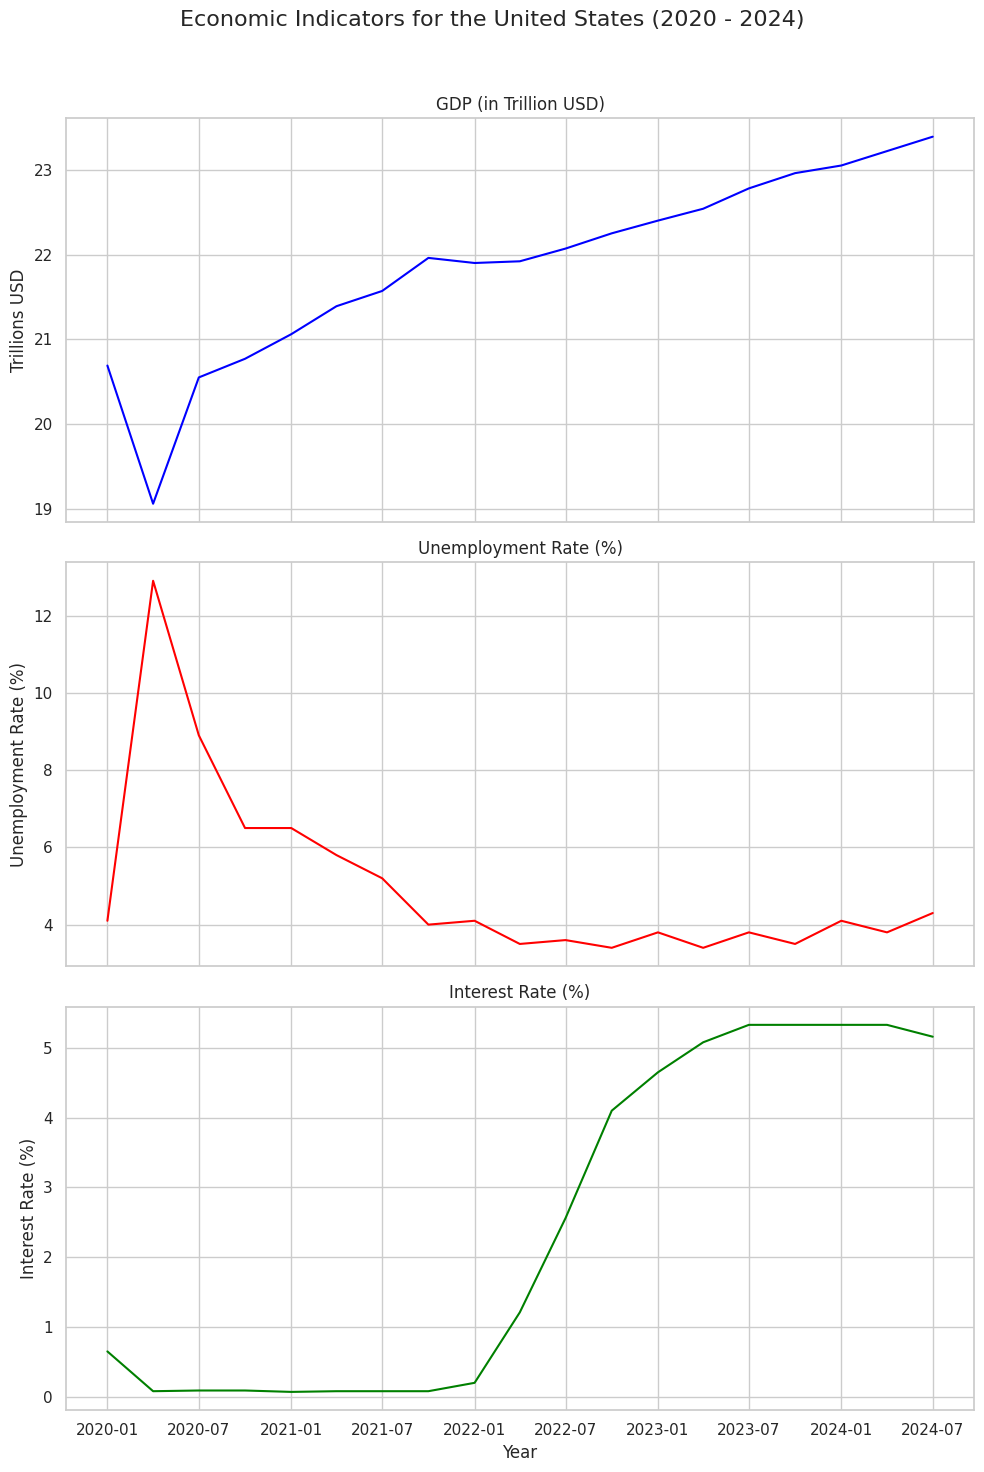

In [95]:
# Extracting the 'value' columns for each metric
gdp_values = gdp_us_recent['value']
unemployment_values = unemployment_us_recent['value']
interest_rate_values = interest_rates_us_recent['value']

# Creating the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plotting GDP
axes[0].plot(gdp_values.index, gdp_values, color='blue')
axes[0].set_title("GDP (in Trillion USD)")
axes[0].set_ylabel("Trillions USD")

# Plotting Unemployment Rate
axes[1].plot(unemployment_values.index, unemployment_values, color='red')
axes[1].set_title("Unemployment Rate (%)")
axes[1].set_ylabel("Unemployment Rate (%)")

# Plotting Interest Rate
axes[2].plot(interest_rate_values.index, interest_rate_values, color='green')
axes[2].set_title("Interest Rate (%)")
axes[2].set_ylabel("Interest Rate (%)")
axes[2].set_xlabel("Year")

# Adding a main title for all subplots
fig.suptitle("Economic Indicators for the United States (2020 - 2024)", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plots
plt.show()


## Explaination of the visualization

**GDP Growth**

Impact on Consumers: A growing GDP suggests a healthy economy, which typically leads to higher consumer confidence and spending.

This can positively impact Apple’s sales as consumers are more likely to purchase electronics and luxury items during periods of economic prosperity.

**Unemployment Rate**

Impact on Consumers: Lower unemployment means more people have disposable income, which can increase sales of Apple products.

When more people are employed, they have more money to spend on non-essential items, including Apple’s products.

**Interest Rates**

Impact on Consumers: Rising interest rates can lead to higher borrowing costs for consumers, potentially reducing discretionary spending on big-ticket items like electronics.

However, if the interest rate rise is due to a strong economy, the positive effects of higher consumer spending might offset the negative impact of higher borrowing costs.

In a nutshell, while economic growth and lower unemployment are favorable, the rising interest rates might curb some consumer spending. Apple will need to balance these factors strategically. 📊

## 4.6 Conclusion

### Financial Performance

**Revenue and Profit:** Consistent growth in operating revenue, gross profit, operating income, and net income shows a healthy financial trajectory.

**Cash Flow:** Strong free cash flow, peaking in 2022, ensures solid liquidity and flexibility in financial operations.

**Balance Sheet**
Debt and Assets: While total debt remains high, Apple’s substantial tangible assets and stable cash reserves balance this out. Effective debt management is crucial here.

### Ratios

**Liquidity Ratios:** Declining current and quick ratios indicate potential liquidity challenges in recent years.

**Cash Ratio:** Improved immediate liquidity despite the overall decline in liquidity ratios.

**P/E Ratio:** High P/E ratio reflects strong investor confidence and growth expectations.

**Dividend Yield:** Stable dividend yield is attractive to income investors.

### Macroeconomic Indicators

**GDP Growth and Unemployment:** Positive trends in GDP growth and declining unemployment rates support consumer spending, which is favorable for Apple.

**Interest Rates:** Rising interest rates may challenge consumer spending on high-ticket items, but overall economic growth and employment trends are supportive.

## Conclusion
Despite some liquidity concerns indicated by declining ratios, Apple’s strong revenue, profit growth, and substantial free cash flow underpin its financial health. The broader economic environment suggests robust consumer spending potential, although rising interest rates could pose some challenges. Apple's brand power, innovative ecosystem, and loyal customer base continue to make it a formidable player in the tech market, balancing any financial hurdles with strong market presence and investor confidence.

Wrapping up, Apple remains a solid investment with a balanced risk-reward profile, provided they manage their liquidity effectively. 📈🍏